In [26]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
#이거 임포트 해줘야 차트에서 오류안남!!! 한글파일때문에 오류나는거.
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.
#font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [27]:
df = pd.read_csv('./기계마모.csv')
print(len(df))
df.head()

10000


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


케클사이트의 기계마모 데이터셋 : 
https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification


## 컬럼내용:
Air temperature: [K]공기 온도 [K]로 나중에 300 K 부근에서 2 K의 표준 편차로 정규화된 랜덤 워크 프로세스를 사용하여 생성

Process temperature [K]: 공정 온도 [K]로 1 K의 표준 편차로 정규화된 랜덤 워크 프로세스를 사용하여 생성되며, 공기 온도에 10 K를 더합니다.

Rotational speed [rpm]: 회전 속도 [rpm]로 2860W의 전력으로 계산되며, 정규 분포 노이즈가 중첩됩니다.

Torque [Nm]: 토크 [Nm]로 토크 값은 일반적으로 40Nm 부근에 분포하며, Δ = 10Nm이며 음의 값은 없습니다.

Tool wear [min]: 공구 마모 [분]로 품질 변형 H/M/L은 공정에서 사용한 공구에 5/3/30분의 공구 마모를 더합니다.

Machine failure: 특정 데이터 지점에서 기계가 고장났는지 여부를 나타내는 '기계 고장' 라벨.

In [28]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [29]:
#필요없는 컬럼 삭제
df.drop(columns=['Product ID','UDI','Type','TWF','HDF','PWF','OSF','RNF'],inplace=True)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


In [30]:
#빈 값이 있는지 채크@
df.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [31]:
#train,test데이터 나누기(split)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
                    df.iloc[:,:5],#문제,
                    df.iloc[:,5],#정답,
                    test_size = 0.2,#비율,
                    random_state=42#시드
)

In [34]:
df.shape

(10000, 6)

In [35]:
df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 468.9 KB


In [36]:
df.values[:3]

array([[ 298.1,  308.6, 1551. ,   42.8,    0. ,    0. ],
       [ 298.2,  308.7, 1408. ,   46.3,    3. ,    0. ],
       [ 298.1,  308.5, 1498. ,   49.4,    5. ,    0. ]])

In [39]:
##모델 선정=> cross-validation
## knn(k최근접이웃) ,svm, decision tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [41]:
knn = KNeighborsClassifier()#k최근접이웃 객체 생성
svm = SVC()
dt = DecisionTreeClassifier()
model_list = [knn, svm, dt]

In [42]:
model_list

[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [43]:
def print_cv(model, train, test, k):
    # 모델에 따라 교차검증하기 위해 model이라는 파라메터 넣고,
    #train, test, k(시드값)도 넣아줌
    scores = cross_val_score(model, train, test, cv=k)
    print('===============교차검증(cv)결과===============', scores)
    mean_scores = np.mean(scores)
    print('===============교차검증(cv)평균 결과===============', scores)
    return scores, mean_scores
#함수의 결과로 여러개의 데이터를 return할 수 있다.

In [44]:
model_names = ['KNeighborsClassifier','SVC','DecisionTreeClassifier']
sc_list = []
mean_sc_list = []
for model in model_list:
    sc, mean_sc = print_cv(model, X_train, y_train, 5)
    sc_list.append(sc)
    print('^^^===========전체 모델의 교차검증 결과 리스트===============')
    mean_sc_list.append(mean_sc)
    print('^^^===========전체 모델의 교차검증 결과 평균 리스트===============')
    
    print('\n*********************************************')
    print('----- 전체 모델 리스트 -----')
    print(model_names)
    print('----- 전체 모델의 교차검증 결과 리스트 -----')
    print(sc_list)
    print('----- 전체 모델의 교차검증 결과 평균 -----')
    print(mean_sc_list)

===============교차검증(cv)결과=============== [0.973125 0.96375  0.970625 0.969375 0.97    ]
===============교차검증(cv)평균 결과=============== [0.973125 0.96375  0.970625 0.969375 0.97    ]
^^^===========전체 모델의 교차검증 결과 리스트===============
^^^===========전체 모델의 교차검증 결과 평균 리스트===============

*********************************************
----- 전체 모델 리스트 -----
['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier']
----- 전체 모델의 교차검증 결과 리스트 -----
[array([0.973125, 0.96375 , 0.970625, 0.969375, 0.97    ])]
----- 전체 모델의 교차검증 결과 평균 -----
[0.969375]
===============교차검증(cv)결과=============== [0.965625 0.966875 0.965    0.965625 0.965625]
===============교차검증(cv)평균 결과=============== [0.965625 0.966875 0.965    0.965625 0.965625]
^^^===========전체 모델의 교차검증 결과 리스트===============
^^^===========전체 모델의 교차검증 결과 평균 리스트===============

*********************************************
----- 전체 모델 리스트 -----
['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier']
----- 전체 모델의 교차검증 결과 리스트 -----
[array([0.973125, 0.96375 ,

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.96575  , 0.9670625, 0.968375 , 0.9696875, 0.971    , 0.9723125,
        0.973625 , 0.9749375, 0.97625  , 0.9775625, 0.978875 ]),
 <BarContainer object of 10 artists>)

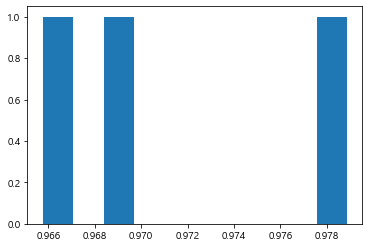

In [45]:
## 3가지 방법을 시각화해서 비교해보자.
plt.hist(mean_sc_list)

In [46]:
##교차검증결과 Decision Tree를 사용해서 테스트 해보기로 결정!

In [47]:
# ##하이퍼 파라메터=> gird search
# def grid_search(model, params, k=5):#cv는 꼭 kfold값이 필요하다@!(k값)
#     gs_model = GridSearchCV(model, params, cv=k)#모든파라메터에 대해 전부 적용시켜주는 모델 GridSearchCV() 
#     print(gs_model)

In [48]:
params = {#하이퍼파라메터 설정으로 가질 수 있는 모든 경우의 수=> 4*3*2=24가지의 경우의 수 생김.
    'max_depth':[3, 5, 7, 10],#key:하이퍼파라메터 명, values는 list타입이어야 함.
    'random_state': [1,3,5],
    'criterion':["gini", "entropy"]#혼란스러운 정도(분류의 정도)를 계산하는 기준
    
}

In [49]:
##하이퍼 파라메터=> gird search
def grid_search(model, params, k=5):
    gs_model = GridSearchCV(model,params,cv=k)#모든파라메터에 대해 전부 적용시켜주는 모델
    #GridSearchCV#모든파라메터에 대해 전부 적용시켜주는 모델
    gs_model.fit(X_train, y_train)#훈련시켜보쟈
    print('best_estimator_은>> ',gs_model.best_estimator_)##최적의 파라메터가 적용된 모델 객체
    print('best_score_은>>> ',gs_model.best_score_)#최적의 파라메터가 적용된 모델로 학습한 정확도 결과(acc)
    print('best_params_은>>> ',gs_model.best_params_)#최적의 파라메터(grid_search를 통해서 찾은)
    print('gs_model은>> ',gs_model)##grid_search객체
    

In [50]:
grid_search(dt, params, 5)

best_estimator_은>>  DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=5)
best_score_은>>>  0.9804999999999999
best_params_은>>>  {'criterion': 'entropy', 'max_depth': 10, 'random_state': 5}
gs_model은>>  GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})


In [51]:
#최적의 파라메터는 {'criterion': 'entropy', 'max_depth': 10, 'random_state': 5}

In [61]:
dt_gs = DecisionTreeClassifier(criterion='entropy', max_depth=10, 
                               random_state= 5)
dt_gs.fit(X_train, y_train)#fit해주자

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=5)

In [74]:
#테스트 데이터로 검증해보자.
predict_result = None
def test_validation(model, X_test, y_test):
    global predict_result
    predict_result = model.predict(X_test)#예측한 결과
    acc = accuracy_score(y_test,predict_result)
    print('accuracy>> ',acc)
    cf = confusion_matrix(y_test, predict_result)#답안지넣고, 예측값 넣고
    #실제(c)-->예측(c,sg),실제(sg)-->예측(c,sg)
    #이진분류(binary classification)인 경우에는
    #예측할 수 있는 경우의 수는 4가지이다.
    #4가지를 표 형태로 정리해주는 것이 confusion_matrix!
    #첫번째 행/렬은 c 두번째 행/렬은 sg, abc..순으로 들어감
    print('confusion_matrix>> \n', cf)
     ##confusion matrix는 binary classfication인 경우에는 보기가 괜찮으나,
    ##multi class classification인 경우에는 보기가 힘들다.
    #이럴 때 사용하는 것이 classification report이다.
    c_report = classification_report(y_test, predict_result)
    print('classification_report>> \n', c_report)

In [75]:
test_validation(dt_gs,X_test, y_test)
# c에 recall이 1.00이면, positive비율(100%)
#dt_gs = DecisionTreeClassifier(criterion='entropy', max_depth=10, 
#                                random_state= 5)

accuracy>>  0.982
confusion_matrix>> 
 [[1922   17]
 [  19   42]]
classification_report>> 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.71      0.69      0.70        61

    accuracy                           0.98      2000
   macro avg       0.85      0.84      0.85      2000
weighted avg       0.98      0.98      0.98      2000



In [76]:
test_validation(dt_gs, X_test, y_test)

accuracy>>  0.982
confusion_matrix>> 
 [[1922   17]
 [  19   42]]
classification_report>> 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.71      0.69      0.70        61

    accuracy                           0.98      2000
   macro avg       0.85      0.84      0.85      2000
weighted avg       0.98      0.98      0.98      2000



In [77]:
y_test.value_counts()

0    1939
1      61
Name: Machine failure, dtype: int64

In [78]:
predict_result

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [79]:
y_test

6252    0
4684    1
1731    0
4742    0
4521    0
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: Machine failure, Length: 2000, dtype: int64

In [80]:
result_df = pd.DataFrame({
    'predict_result': predict_result,
    'y_test': y_test    
})
result_df

,predict_result,y_test
6252,0,0
4684,0,1
1731,0,0
4742,0,0
4521,0,0
...,...,...
6412,0,0
8285,0,0
7853,0,0
1095,1,1


In [81]:
encoder = LabelEncoder()

In [82]:
col = result_df.columns
col

Index(['predict_result', 'y_test'], dtype='object')

In [84]:
for c in col:
    result_df[c] = encoder.fit_transform(result_df[c])
result_df.head()

,predict_result,y_test
6252,0,0
4684,0,1
1731,0,0
4742,0,0
4521,0,0


In [85]:
y_pred_proba = dt_gs.predict_proba(X_test)[:,1]
y_pred_proba

array([0., 0., 0., ..., 0., 1., 0.])

In [86]:
for_roc_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred_proba': y_pred_proba
})
for_roc_df

,y_test,y_pred_proba
6252,0,0.0
4684,1,0.0
1731,0,0.0
4742,0,0.0
4521,0,0.0
...,...,...
6412,0,0.0
8285,0,0.0
7853,0,0.0
1095,1,1.0


In [87]:
for_roc_df['y_test'] = encoder.fit_transform(for_roc_df['y_test'])

In [88]:
for_roc_df.head()

,y_test,y_pred_proba
6252,0,0.0
4684,1,0.0
1731,0,0.0
4742,0,0.0
4521,0,0.0


In [89]:
# roc_curve(타겟값, prob of 1) 그래프 그리기
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
'FPR': fpr, 
'TPR': tpr, 
'Threshold': thresholds
})
roc

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000
1,0.007220,0.622951,1.000000
2,0.007220,0.688525,0.857143
3,0.007736,0.688525,0.800000
4,0.008767,0.688525,0.666667
5,0.011862,0.721311,0.500000
6,0.014440,0.737705,0.250000
7,0.014956,0.737705,0.200000
8,0.020629,0.737705,0.076923
9,0.021661,0.737705,0.066667


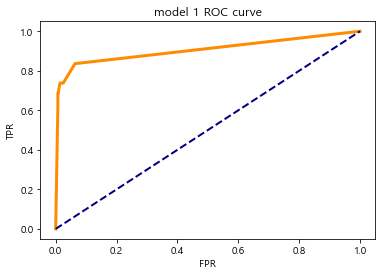

In [90]:
plt.plot(fpr, tpr,   color="darkorange", lw=3,)
plt.title('model 1 ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
#2사분면 모서리에 선이 붙을 수록 정확도가 높은 그래프